In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Dataset

In [3]:
data=pd.read_csv('indian_liver_patient.csv')

In [4]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
data.shape

(583, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

# Data Vizualization

In [10]:
LD,NLD=data['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients diagnosed with liver disease:  414
Number of patients not diagnosed with liver disease:  165


Number of patients diagnosed with liver disease:  414
Number of patients not diagnosed with liver disease:  165


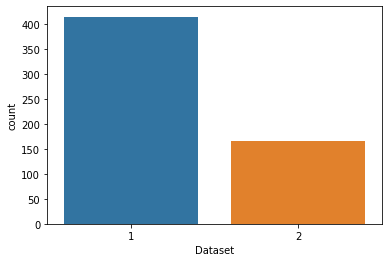

In [14]:
sns.countplot(data=data,x="Dataset",label="count");
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

In [12]:
M, F = data['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

Number of patients that are male:  439
Number of patients that are female:  140


Number of patients that are male:  439
Number of patients that are female:  140


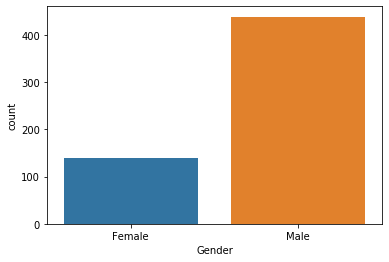

In [13]:
sns.countplot(data=data,x="Gender",label="count");
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

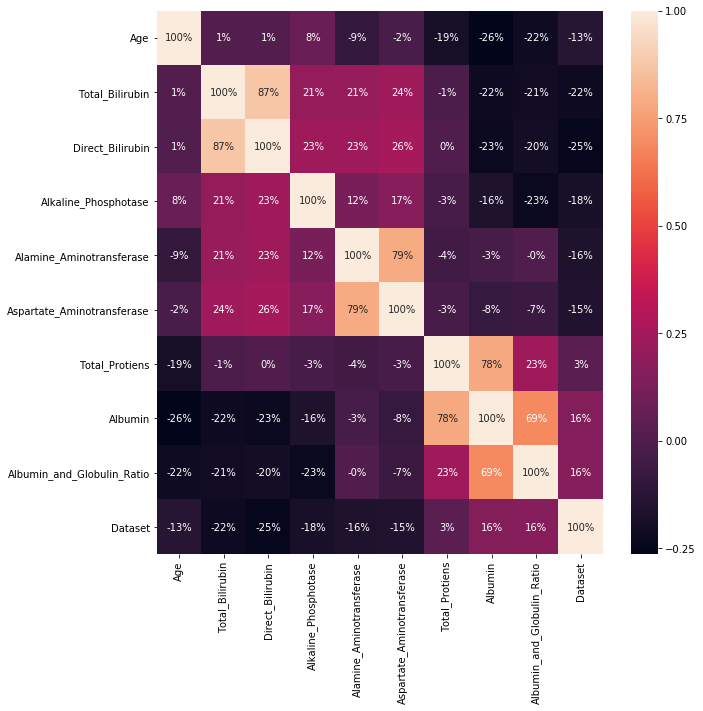

In [16]:
fig,ax=plt.subplots(figsize=(10,10))
ax=sns.heatmap(data.corr(),annot=True,fmt='.0%')
bottom,top=ax.get_ylim()
ax.set_ylim(bottom + 0.5, top-0.5);

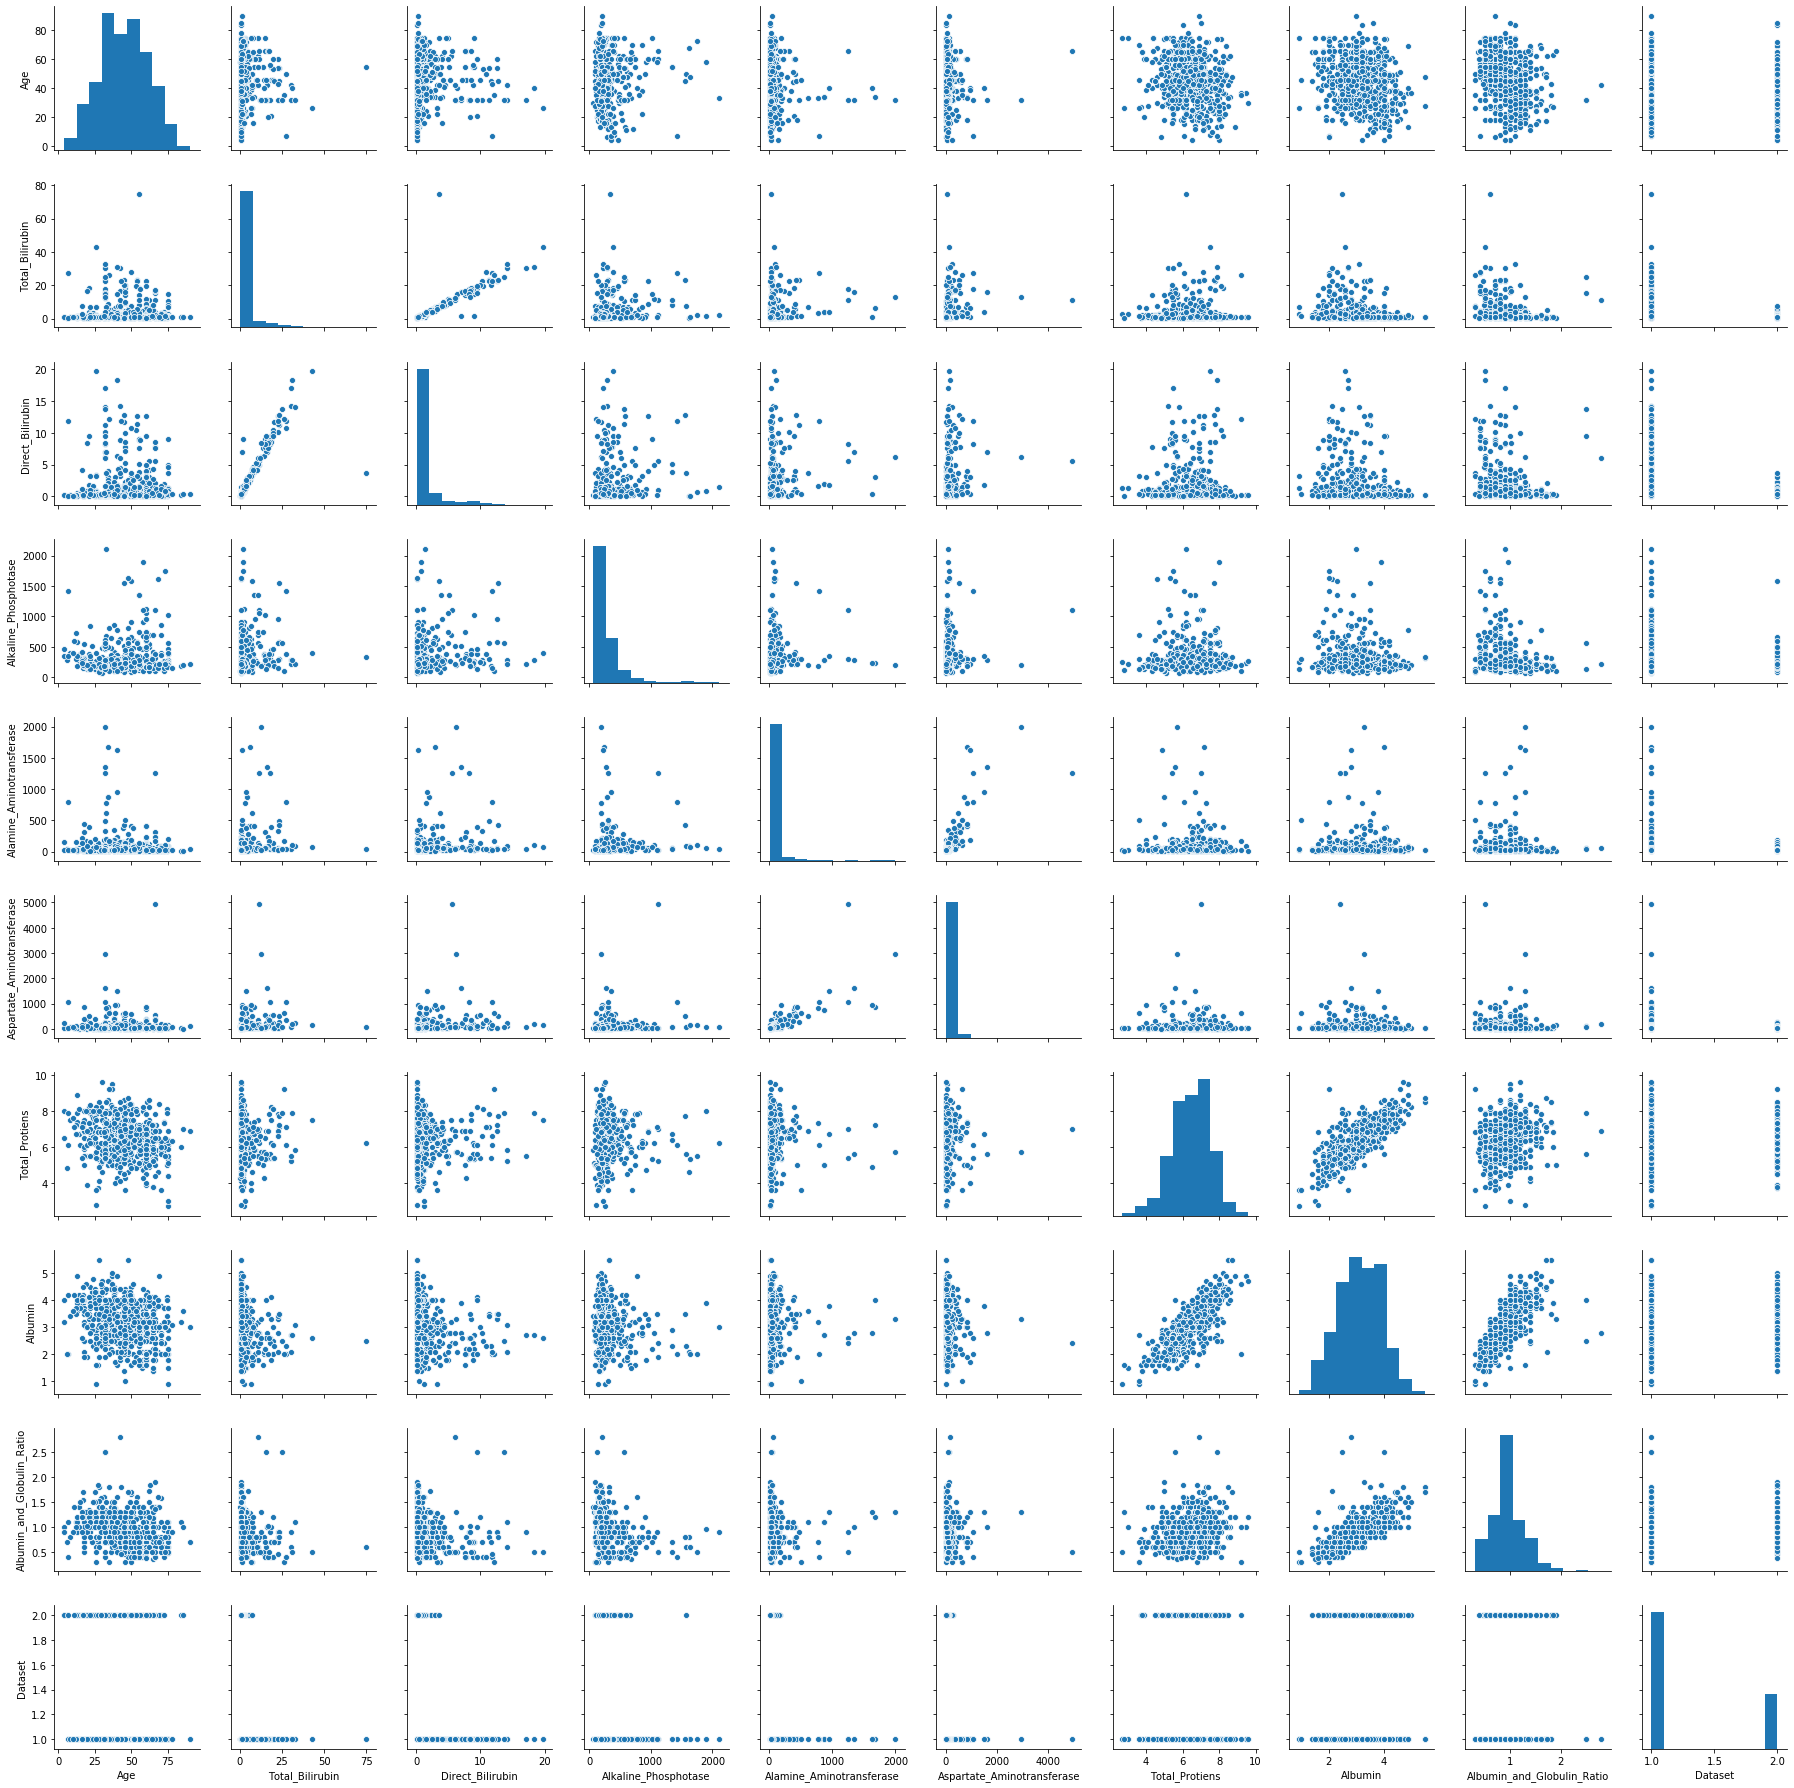

In [17]:
sns.pairplot(data)

In [54]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data['Gender']=lb.fit_transform(data['Gender'])
data['Dataset']=lb.fit_transform(data['Dataset'])

# Selecting Dependent and Independent Variables

In [55]:
x=data.iloc[:,:10].values
x

array([[65.  ,  0.  ,  0.7 , ...,  6.8 ,  3.3 ,  0.9 ],
       [62.  ,  1.  , 10.9 , ...,  7.5 ,  3.2 ,  0.74],
       [62.  ,  1.  ,  7.3 , ...,  7.  ,  3.3 ,  0.89],
       ...,
       [52.  ,  1.  ,  0.8 , ...,  6.4 ,  3.2 ,  1.  ],
       [31.  ,  1.  ,  1.3 , ...,  6.8 ,  3.4 ,  1.  ],
       [38.  ,  1.  ,  1.  , ...,  7.3 ,  4.4 ,  1.5 ]])

In [56]:
y=data.iloc[:,10:11].values
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
    

# Splitting data into Train and Test split

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Feature Scaling

In [58]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
X_train=m.fit_transform(X_train)
X_test=m.transform(X_test)

# Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=0,C=100)
log.fit(X_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(X_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# Suppor Vector Machines

In [61]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Naive-Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()
gn.fit(X_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

# Decision tree

In [63]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='gini',random_state=0)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

# RandomForestClassifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy',n_estimators=10,random_state=0)
rf.fit(X_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [65]:
def t_accuracy(X_train,y_train):
    print("Logistic Regression Training Accuracy: ",log.score(X_train,y_train))
    print("K Nearest Neighbors Training Accuracy: ",knn.score(X_train,y_train))
    print("Naive-Bayes Training accuracy: ",gn.score(X_train,y_train))
    print("Support Vector Machines Training Accuracy: ",sv.score(X_train,y_train))
    print("Decision Tree Classifier Training Accuracy: ",dtc.score(X_train,y_train))
    print("Random Forest Classifier Training Accuracy: ",rf.score(X_train,y_train))
t_accuracy(X_train,y_train)

Logistic Regression Training Accuracy:  0.7365010799136069
K Nearest Neighbors Training Accuracy:  0.7710583153347732
Naive-Bayes Training accuracy:  0.5637149028077754
Support Vector Machines Training Accuracy:  0.7170626349892009
Decision Tree Classifier Training Accuracy:  1.0
Random Forest Classifier Training Accuracy:  0.9740820734341252


# Evaluation

In [66]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
import sklearn.metrics as metrics

In [67]:
def evaluate_preds(y_true,y_preds):
    accuracy=accuracy_score(y_true,y_preds)
    precison=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    fpr,tpr,threshold=metrics.roc_curve(y_true,y_preds)
    roc_auc=metrics.auc(fpr,tpr)
    print(f"Acc:{accuracy*100:.2F}%")
    print(f"prec:{precison:.2F}")
    print(f"recall:{recall:.2F}")
    print(f"f1:{f1:.2F}")
    print(f"roc_auc:{roc_auc:.2F}\n")

In [68]:
def eval_model(y_test,X_test):
    print("Evaluation of Logistic Regression: ")
    evaluate_preds(y_test,log.predict(X_test))
    print("Evaluation of K-nearest-neighbours: ")
    evaluate_preds(y_test,knn.predict(X_test))
    print("Evaluation of Naive-Bayes: ")
    evaluate_preds(y_test,gn.predict(X_test))
    print("Evaluation of SVM:")
    evaluate_preds(y_test,sv.predict(X_test))
    print("Evaluation of Decision Tree: ")
    evaluate_preds(y_test,dtc.predict(X_test))
    print("Evaluation of Random Forest: ")
    evaluate_preds(y_test,rf.predict(X_test))

In [69]:
eval_model(y_test,X_test)

Evaluation of Logistic Regression: 
Acc:72.41%
prec:0.62
recall:0.15
f1:0.24
roc_auc:0.56

Evaluation of K-nearest-neighbours: 
Acc:61.21%
prec:0.32
recall:0.29
f1:0.31
roc_auc:0.52

Evaluation of Naive-Bayes: 
Acc:54.31%
prec:0.39
recall:0.94
f1:0.55
roc_auc:0.66

Evaluation of SVM:
Acc:70.69%
prec:0.00
recall:0.00
f1:0.00
roc_auc:0.50

Evaluation of Decision Tree: 
Acc:68.10%
prec:0.44
recall:0.32
f1:0.37
roc_auc:0.58

Evaluation of Random Forest: 
Acc:68.10%
prec:0.42
recall:0.24
f1:0.30
roc_auc:0.55



C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Confusion Matrix

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
def eval_conf_matrix(y_test,X_test):
    print("Logistic Regression: ")
    print(confusion_matrix(y_test,log.predict(X_test)))
    print("K-nearest-neighbours: ")
    print(confusion_matrix(y_test,knn.predict(X_test)))
    print("Naive-Bayes: ")
    print(confusion_matrix(y_test,gn.predict(X_test)))
    print("Support Vector Machines: ")
    print(confusion_matrix(y_test,sv.predict(X_test)))
    print("Decision Tree: ")
    print(confusion_matrix(y_test,dtc.predict(X_test)))
    print("Random Forest: ")
    print(confusion_matrix(y_test,rf.predict(X_test)))

In [72]:
eval_conf_matrix(y_test,X_test)

Logistic Regression: 
[[79  3]
 [29  5]]
K-nearest-neighbours: 
[[61 21]
 [24 10]]
Naive-Bayes: 
[[31 51]
 [ 2 32]]
Support Vector Machines: 
[[82  0]
 [34  0]]
Decision Tree: 
[[68 14]
 [23 11]]
Random Forest: 
[[71 11]
 [26  8]]


##### From above conclusion Logistic regression model perform well here

# Evaluation of Logistic Regression model

## Confusion Matrix

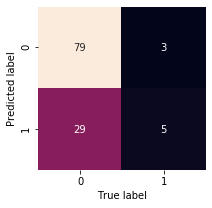

In [73]:
cm=confusion_matrix(y_test,log.predict(X_test))
def plot_conf_mat(conf_mat):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(conf_mat,annot=True,cbar=False,)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    #fix the broken annotations
    bottom,top=ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top-0.5)
plot_conf_mat(cm)

## Classification report

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test,log.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        82
           1       0.62      0.15      0.24        34

    accuracy                           0.72       116
   macro avg       0.68      0.56      0.53       116
weighted avg       0.70      0.72      0.66       116



## ROC_AUC curve

In [77]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,log.predict(X_test))
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.5552367288378766

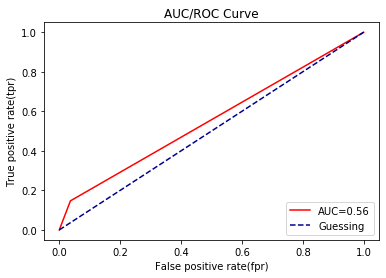

In [78]:
fig,ax=plt.subplots()
ax.plot(fpr,tpr,'r',label="AUC=%0.2F"%roc_auc)
ax.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
#customize the plot
ax.set(xlabel="False positive rate(fpr)",ylabel="True positive rate(tpr)",title="AUC/ROC Curve")
ax.legend(loc="lower right");

# Saving The Model

In [79]:
from joblib import dump
import pickle
pickle.dump(log,open('model.pkl','wb'))